In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,NaN,0.88269,NaN,1.62780,3.29400,1.08500,0.15740,NaN,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	2
float64		column 3	1
float64		column 4	3
float64		column 5	2
float64		column 6	4
float64		column 7	4
float64		column 8	2
float64		column 9	4
float64		column 10	5
float64		column 11	4
float64		column 12	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,399.000000,398.000000,399.000000,397.000000,398.000000,396.000000,396.000000,398.000000,396.000000,395.000000,396.000000,396.000000
mean,-0.110756,0.088438,2.040244,1.897773,1.936497,1.980448,2.029552,1.984628,1.961397,2.027643,1.968250,1.961536
std,2.559149,2.748844,1.134921,1.143216,1.165242,1.142242,1.160575,1.138988,1.144553,1.160102,1.152167,1.195072
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.016500,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.698550,-0.808285,1.121050,0.945100,0.879355,1.028333,0.982585,1.030050,1.006645,1.031300,0.914640,0.906330
50%,-0.072087,0.030257,2.093200,1.782900,1.921050,2.026750,2.101400,1.966950,2.067200,2.087700,1.913900,1.925400
75%,0.745785,0.901683,2.992350,2.804300,2.982000,2.966250,2.978600,3.020100,2.927250,3.044600,2.967075,3.008225
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

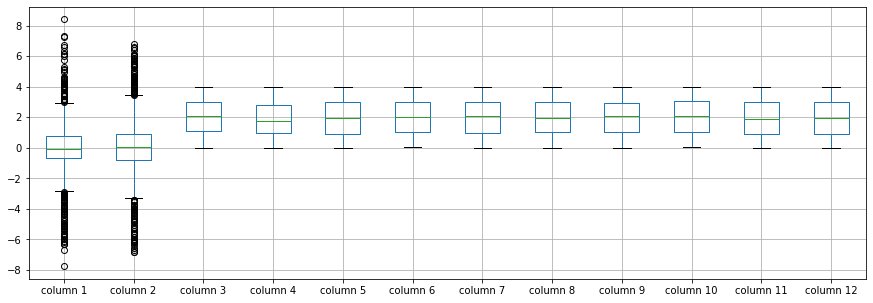

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.110756
column 2     0.088438
column 3     2.040244
column 4     1.897773
column 5     1.936497
column 6     1.980448
column 7     2.029552
column 8     1.984628
column 9     1.961397
column 10    2.027643
column 11    1.968250
column 12    1.961536
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.008122,-0.054853,-0.070749,0.011633,0.000053,-0.014281,0.035638,-0.020364,0.060690,0.087675,-0.023620
column 2,0.008122,1.000000,-0.057018,0.035790,-0.091837,-0.091373,0.018517,-0.015377,-0.008583,0.015061,-0.034007,0.060244
column 3,-0.054853,-0.057018,1.000000,0.003732,-0.023092,-0.058408,-0.092707,0.079272,0.114137,-0.022071,-0.070652,-0.003168
column 4,-0.070749,0.035790,0.003732,1.000000,-0.007176,0.102406,0.006217,0.086224,0.002213,0.088298,-0.019161,-0.067029
column 5,0.011633,-0.091837,-0.023092,-0.007176,1.000000,0.074141,0.027404,0.006030,0.003211,0.018867,0.000881,-0.032220
column 6,0.000053,-0.091373,-0.058408,0.102406,0.074141,1.000000,0.002210,0.080509,0.020892,-0.016005,0.004913,-0.038506
column 7,-0.014281,0.018517,-0.092707,0.006217,0.027404,0.002210,1.000000,-0.035453,0.090553,0.036369,0.000332,-0.055547
column 8,0.035638,-0.015377,0.079272,0.086224,0.006030,0.080509,-0.035453,1.000000,0.053021,-0.138737,-0.048317,-0.008651
column 9,-0.020364,-0.008583,0.114137,0.002213,0.003211,0.020892,0.090553,0.053021,1.000000,0.015030,0.024349,0.055199
column 10,0.060690,0.015061,-0.022071,0.088298,0.018867,-0.016005,0.036369,-0.138737,0.015030,1.000000,-0.010061,0.027009


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+25,12+25+25,12+25+25+25,12+25+25+25+25,12+25+25+25+25+25,12+25+25+25+25+25+25,12+25+25+25+25+25+25+25,12+25+25+25+25+25+25,12+25+25+25+25+25,12+25+25+25+25,12+25+25+25,12+25+25,12+25,12], vae_layer = False, seed = 25)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.74957260131836
Epoch: 1 , loss: 27.64353355407715
Epoch: 2 , loss: 27.572589797973635
Epoch: 3 , loss: 27.492858505249025
Epoch: 4 , loss: 27.20333061218262
Epoch: 5 , loss: 25.988835983276367
Epoch: 6 , loss: 24.2763427734375
Epoch: 7 , loss: 23.679825744628907
Epoch: 8 , loss: 23.097262802124025
Epoch: 9 , loss: 22.55073516845703
Epoch: 10 , loss: 22.587545318603517
Epoch: 11 , loss: 22.20156135559082
Epoch: 12 , loss: 22.156922149658204
Epoch: 13 , loss: 21.77401786804199
Epoch: 14 , loss: 21.65715476989746
Epoch: 15 , loss: 21.214481048583984
Epoch: 16 , loss: 20.710677947998047
Epoch: 17 , loss: 20.699618301391602
Epoch: 18 , loss: 20.690985488891602
Epoch: 19 , loss: 20.602192687988282
Epoch: 20 , loss: 20.43409996032715
Epoch: 21 , loss: 20.1811540222168
Epoch: 22 , loss: 20.196019287109376
Epoch: 23 , loss: 20.20998207092285
Epoch: 24 , loss: 20.631538009643556
Epoch: 25 , loss: 20.042547607

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,-2.090197,0.0,1.307254,0.0,0.0,0.0,0.0,1.165594,0.0
396,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
397,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
398,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(12.404793992981821, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.07597509792376389

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.836300,2.88660,2.469600,0.21541,3.09000,0.78343,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.48861,1.434300,3.12990,1.277800,1.42850,0.14333,1.19480,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.61050,1.337100,3.76820,1.210000,3.99630,2.21730,3.90290,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.332780,0.19027,0.567160,1.66010,2.35270,0.66126,3.13510,3.938100,3.734600
4,-0.268400,-1.006000,2.88220,1.561600,3.20140,3.377400,1.52260,0.98475,3.10940,3.65640,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,1.614603,0.88269,1.661314,1.62780,3.29400,1.08500,0.15740,1.630634,2.851400
396,0.264630,-6.107600,3.90540,1.337700,1.41870,1.686100,1.09510,3.79360,0.12790,0.54249,3.365800,3.755600
397,-3.479100,-1.993300,1.32480,1.772100,2.55090,1.470100,0.92540,1.84110,3.47730,0.95496,1.526300,2.123800
398,7.293000,-0.411470,2.49480,0.396550,2.99900,3.410100,2.95160,0.27800,0.99059,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AW_1(imp).xlsx", index=False, header=False)